In [156]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

extra_param = False
apply_mask = False

full_length = False
check_best_fit = False
check_best_fit2 = True
# or
paper_length = True

trial = 0

t_full = (np.arange(1,15)) / 25
t_full = t_full - t_full[0] # reset t to start at 0

print(t_full)
diff1 = [1,14.5,15.3,15.8,16.9,23.9,10.7,17.3,19,20.1,16.2,9.9,8.4,4.5]
diff2 = [2.4,9.6,10.7,16.3,20.7,26.5,36.3,51.1,112.6,44,32.6,13.9,14.2,18]
diff3 = [2.5,6.2,10.1,6.9,16.3,21.2,29.4,41.2,104.3,63.7,47.5,14.9,21.8,20.9]
diff4 = [7,11,4.5,8.9,24.6,34.2,3.2,3.9,18.9]
diff5 = [6.9,23.3,14.8,24.1,8.1,13.1,9.7,14.1,24.6]
diff6 = [6.8,15.4,7.1,11.8,27.2,30.9,29.8,41.3,108.1]
diff7 = [5.2,7.1,7.6,7.6,9.1,41.6,89.3,50.8,21.6]

le_found = [3.50,9.73,9.07,7.88,-0.248,6.3,4.38]
len_found = [11,9,8,6,8,8,4]

diffs = [diff1, diff2, diff3, diff4, diff5, diff6, diff7]
labels = ['trial1_2', 'trial2_3', 'trial1_3', 'trial1_4', 'trial2_4', 'trail3_4', 'trial1_5']
d0s = [diff[0] for diff in diffs]

[0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52]


In [157]:
# Define the exponential function to fit
def exponential_func1(x, le, d0):
    return d0 * np.exp(le * x)


def fit_exponential1(t, diff, d0, le0):
    
    # Fit the exponential function to the data
    # popt, pcov = curve_fit(exponential_func, t, diff) # complete fit
    popt, pcov = curve_fit(exponential_func1, t, diff, bounds=([-np.inf, d0], [np.inf, d0 + 1e-7])) # fit with d0 fixed
    # popt, pcov = curve_fit(exponential_func, t, diff, p0=[le0, d0]) # fit with d0 and le0 guesses
    

    # Calculate the chi-squared value
    residuals = diff - exponential_func1(t, *popt)
    chi_squared = np.sum(residuals**2 / exponential_func1(t, *popt))

    # Calculate the errors on the fitted parameters
    perr = np.sqrt(np.diag(pcov))

    # Calculate the reduced chi-squared value
    n = len(diff) # number of data points
    k = len(popt) # number of fitted parameters
    red_chi_squared = chi_squared / (n - k)

    return popt, perr, chi_squared, red_chi_squared

In [158]:
def exponential_func2(x, le, d0, c):
    return d0 * np.exp(le * x) + c

paper_c = 0

def fit_exponential2(t, diff, d0, le0):
    
    # Fit the exponential function to the data
    # popt, pcov = curve_fit(exponential_func, t, diff) # complete fit
    popt, pcov = curve_fit(exponential_func2, t, diff, bounds=([-np.inf, d0,-np.inf ], [np.inf, d0 + 1e-7,np.inf]))
    # popt, pcov = curve_fit(exponential_func, t, diff, p0=[le0, d0, 0]) # fit with d0 and le0 guesses
    

    # Calculate the chi-squared value
    residuals = diff - exponential_func2(t, *popt)
    chi_squared = np.sum(residuals**2 / exponential_func2(t, *popt))

    # Calculate the errors on the fitted parameters
    perr = np.sqrt(np.diag(pcov))

    # Calculate the reduced chi-squared value
    n = len(diff) # number of data points
    k = len(popt) # number of fitted parameters
    red_chi_squared = chi_squared / (n - k)

    return popt, perr, chi_squared, red_chi_squared

In [159]:
if full_length or check_best_fit or check_best_fit2:
    t = t_full[:len(diffs[trial])]
    diff = diffs[trial]
elif paper_length:
    t = t_full[:len_found[trial]]
    diff = diffs[trial][:len_found[trial]]    
    
d0 = d0s[trial]
le0 = le_found[trial]

if apply_mask:
    print("mask applied !")
    mask = [True for i in range(len(diff3))]

    for i in ([3]+list(range(10,(len(diff3))))):
        mask[i] = False
        
    diff = np.array(diff3)[mask]
    t = np.array(t[:len(diff3)])[mask]

paper length applied !
4_points: (0, 4), red_chi_squared: 31.73622459197629, lambda: 24.298040942723702 +\- 30.083712672047465, d0: 1.0000000999999257 +\- 3.450753737559857
5_points: (0, 5), red_chi_squared: 33.98800900947305, lambda: 18.898869699744356 +\- 18.745003632596532, d0: 1.0000000999999998 +\- 2.824108072671707
6_points: (0, 6), red_chi_squared: 32.016178711445, lambda: 16.52507582486552 +\- 11.072085119466692, d0: 1.0000000999999998 +\- 2.0772945804898844
7_points: (0, 7), red_chi_squared: 42.34583232901608, lambda: 12.62181650043506 +\- 12.878486860947534, d0: 1.0000000999999998 +\- 2.8391526797033837
8_points: (0, 8), red_chi_squared: 43.106759614822295, lambda: 11.13024980292036 +\- 9.547784058148803, d0: 1.0000000999999998 +\- 2.4438585910601884
9_points: (0, 9), red_chi_squared: 43.35505414454737, lambda: 10.016041607567745 +\- 7.3410833897429875, d0: 1.0000000999999528 +\- 2.1407810474787325
10_points: (0, 10), red_chi_squared: 43.6738327773172, lambda: 9.1063722099822

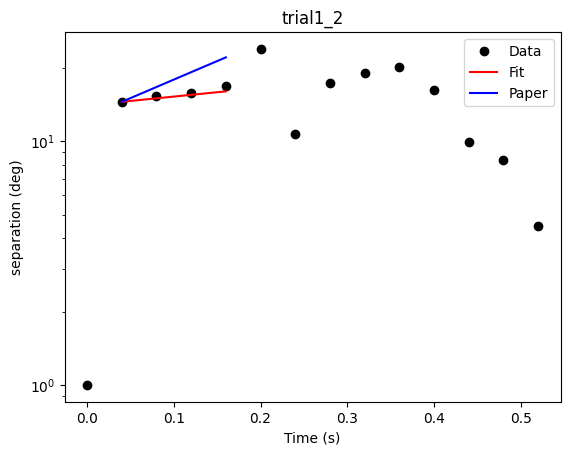

In [160]:
if extra_param: print("extra param applied !")
if check_best_fit: print("checking best fit too !")
elif paper_length and not check_best_fit: print("paper length applied !")
elif full_length and not check_best_fit: print("full length applied !")
if apply_mask: print("mask applied !")

if check_best_fit:
    # Define the range of points to consider
    max_points = len(diff)
    min_points = 4
    
    # Initialize variables to store the best fit
    best_fit = None
    best_points = None
    red_chi_squared = np.inf

    # Loop over all possible combinations of points
    for n_points in range(min_points, max_points+1):
        t_now = t[:n_points]
        diff_now = diff[:n_points]

        # Fit the exponential function to the data
        if extra_param: popt1, perr1, chi_squared1, red_chi_squared1 = fit_exponential2(t_now, diff_now, diff_now[0], le_found[trial])
        else: popt1, perr1, chi_squared1, red_chi_squared1 = fit_exponential1(t_now, diff_now, diff_now[0], le_found[trial])
        
        
        if extra_param: print(f"n_points: {(0,n_points)}, red_chi_squared: {red_chi_squared1}, lambda: {popt1[0]} +\- {perr1[0]}, d0: {popt1[1]} +\- {perr1[1]}, c: {popt1[2]} +\- {perr1[2]}")
        else: print(f"n_points: {(0,n_points)}, red_chi_squared: {red_chi_squared1}, lambda: {popt1[0]} +\- {perr1[0]}, d0: {popt1[1]} +\- {perr1[1]}")
        
        # Check if this fit is the best so far
        if red_chi_squared1 < red_chi_squared:
            popt = popt1
            perr = perr1
            chi_squared = chi_squared1
            red_chi_squared = red_chi_squared1
            best_points = (0, n_points)
    
    print(f"current best_points: {best_points}")
    
    confirm = input("Enter the confirmed best_points ('n' if just take the best fit) :")
    if confirm == 'n': pass
    else:
        best_points = np.array(confirm.split(','), dtype=int)
    
    j_start, j_end = best_points
    t = t[j_start:j_end]
    diff = diff[j_start:j_end]
    
elif check_best_fit2: # for taking successive points in middle too
    
    # Define the range of points to consider
    max_points = len(diff)
    min_points = 4

    # Initialize variables to store the best fit
    best_fit = None
    best_points = None
    red_chi_squared = np.inf

    # Loop over all possible combinations of points
    for n_points_start in range(max_points+1 - min_points):
            for n_points_end in range(n_points_start + min_points, max_points+1):
                t_now = t_full[n_points_start:n_points_end]
                diff_now = diffs[trial][n_points_start:n_points_end]

                # Fit the exponential function to the data
                if extra_param: popt1, perr1, chi_squared1, red_chi_squared1 = fit_exponential2(t_now, diff_now, diff_now[0], le_found[trial])
                else: popt1, perr1, chi_squared1, red_chi_squared1 = fit_exponential1(t_now, diff_now, diff_now[0], le_found[trial])


                if extra_param: print(f"n_points: {(n_points_start,n_points_end)}, red_chi_squared: {red_chi_squared1}, lambda: {popt1[0]} +\- {perr1[0]}, d0: {popt1[1]} +\- {perr1[1]}, c: {popt1[2]} +\- {perr1[2]}")
                else: print(f"{n_points_end-n_points_start}_points: {(n_points_start,n_points_end)}, red_chi_squared: {red_chi_squared1}, lambda: {popt1[0]} +\- {perr1[0]}, d0: {popt1[1]} +\- {perr1[1]}")
                
                # Check if this fit is the best so far
                if red_chi_squared1 < red_chi_squared:
                    popt = popt1
                    perr = perr1
                    chi_squared = chi_squared1
                    red_chi_squared = red_chi_squared1
                    best_points = (n_points_start, n_points_end)
    
    print(f"current best_points: {best_points}")
    
    confirm = input("Enter the confirmed best_points ('n' if just take the best fit) :")
    if confirm == 'n': pass
    else:
        best_points = np.array(confirm.split(','), dtype=int)
        popt, perr, chi_squared, red_chi_squared = fit_exponential1(t_full[best_points[0]:best_points[1]], diffs[trial][best_points[0]:best_points[1]], diffs[trial][best_points[0]], le_found[trial])
    j_start, j_end = best_points
    t = t_full[j_start:j_end]
    diff = diffs[trial][j_start:j_end]
    
else: 
    if extra_param: popt, perr, chi_squared, red_chi_squared = fit_exponential2(t, diff, d0, le0)
    else: popt, perr, chi_squared, red_chi_squared = fit_exponential1(t, diff, d0, le0)
    j_start, j_end = 0, len(diff)

%matplotlib inline
print('Fitted parameters:', popt)
print('Parameter errors:', perr)
print('Chi-squared:', chi_squared)
print('Reduced chi-squared:', red_chi_squared)

# plotting the data
plt.plot(t_full[:len(diffs[trial])], diffs[trial], 'ko', label='Data')


if extra_param: plt.plot(t, exponential_func2(t - t[0], *popt), 'b-', label='Fit_c')
else: plt.plot(t, exponential_func1(t - t[0], *popt), 'r-', label='Fit')
if extra_param: plt.plot(t, exponential_func2(t - t[0], le0, diff[0], paper_c), 'b-', label='Paper_c')
else: plt.plot(t, exponential_func1(t - t[0], le0, diff[0]), 'b-', label='Paper')

plt.xlabel('Time (s)')
plt.ylabel('separation (deg)')
plt.title(labels[trial])
plt.yscale('log')
plt.legend()
plt.show()

In [161]:
# Define the values and their errors
values1 = [3.5,9.73,9.07,7.88,-0.248,6.3,4.38,12.73,12.15,12.38]
errors1 = [0.02,0.03,0.04,0.005,0.04,0.03,0.1,0.06,0.05,0.05]

indices = [] # indices of values to remove

values = []
errors = []

for i in range(len(values1)):
    if i not in indices:
        values.append(values1[i])
        errors.append(errors1[i])

# values = values[:]
# errors = errors[:]

values = np.float64(values)
errors = np.float64(errors)

# Calculate the weighted average
weighted_sum = 0
weight_sum = 0
for i in range(len(values)):
    weighted_sum += values[i] / (errors[i]**2)
    weight_sum += 1 / (errors[i]**2)
    # print(f'{weighted_sum} / {weight_sum}')
weighted_average = weighted_sum / weight_sum
weighted_error = np.sqrt(1 / weight_sum)

sum = 0
for i in range(len(values)):
    sum += (values[i] - weighted_average)**2
weighted_error2 = np.sqrt(sum) / (len(values)-1)

average = np.mean(values)
error = np.sqrt(np.sum(np.array(errors)**2)/ (len(errors)-1)) 



print('Weighted average:', weighted_average)
print('Weighted error:', weighted_error)
print('Weighted error 2:', weighted_error2)

print('Average:', average)
print('Error:', error)


Weighted average: 7.657708848827619
Weighted error: 0.00460531299058504
Weighted error 2: 1.4355312398281213
Average: 7.7872
Error: 0.05166666666666667
